# Daily-Dose-of-Data-Science

[Daily Dose of Data Science](https://avichawla.substack.com) is a publication on Substack that brings together intriguing frameworks, libraries, technologies, and tips that make the life cycle of a Data Science project effortless. 

Author: Avi Chawla

[Medium](https://medium.com/@avi_chawla) | [LinkedIn](https://www.linkedin.com/in/avi-chawla/)

# An Interesting and Lesser-Know Way To Create Plots Using Pandas

Post Link: [Substack](https://avichawla.substack.com/p/inline-plots-pandas)

LinkedIn Post: [LinkedIn](https://www.linkedin.com/feed/update/urn:li:activity:7034124961921286144/)

In [1]:
from base64 import b64encode
import numpy as np
import pandas as pd
from io import BytesIO
from IPython.display import HTML

%matplotlib inline

In [2]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.colheader_justify', 'left')
pd.set_option('display.max_seq_items', 1)

plt.rcParams['figure.dpi'] = 150
# plt.rcParams['savefig.dpi'] = 150

2023-02-22 17:02:32,328 [64937] WARNING  py.warnings:109: [JupyterRequire] /var/folders/3w/0h9rv7rx7zq40g17g_bqrxvc0000gn/T/ipykernel_64937/724828993.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)



<IPython.core.display.Javascript object>

In [3]:
n = 100

data = [
    ('Bitcoin',   40000*np.random.rand(n).round(2)), 
    ('Ethereum',   2000*np.random.rand(n).round(2)), 
    ('BNB',     500*np.random.rand(n).round(2)),
    ('Litecoin',   150*np.random.rand(n).round(2)),
    
]
df = pd.DataFrame(data, columns=['Name', 'Price History'])

In [4]:
def create_line(data, figsize=(3, 0.25), **kwags):
    
    data = list(data)
    
    fig, ax = plt.subplots(1, 1, figsize=figsize, **kwags)
    ax.plot(data)
    for k,v in ax.spines.items():
        v.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])    

    plt.plot(len(data) - 1, data[len(data) - 1], 'r.')

    ax.fill_between(range(len(data)), data, len(data)*[min(data)], alpha=0.1)
    plt.close(fig)
    img = BytesIO()    
    
    fig.savefig(img, format='png')
    encoded = b64encode(img.getvalue()).decode('utf-8')  
    return '<img src="data:image/png;base64,{}"/>'.format(encoded)

In [5]:
def create_hist(data):
    fig, ax = plt.subplots(figsize=(2, 0.5)) 
    ax.hist(data, bins=10)
    ax.axis('off')
    plt.close(fig)
    
    img = BytesIO()  # create Bytes Object
    fig.savefig(img) # Save Image to Bytes Object
    encoded = b64encode(img.getvalue())  # Encode object as base64 byte string
    decoded = encoded.decode('utf-8')    # Decode to utf-8
    return f'<img src="data:png;base64,{decoded}">' # Return HTML tag

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Name,Price History,Last 7 Days Price,Last 10 Days Trade Volume
0,Bitcoin,"[9600.0, ...]",,"<img src=""data:png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAABLCAYAAADK+7ojAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/NK7nSAAAACXBIWXMAABcSAAAXEgFnn9JSAAABXUlEQVR4nO3bwYkCQRRF0enBQMxnEjIEEzIfMykDGBe9KO2+1DkBSIFw+Tx0G2P8ABT8Hv0AgL0EC8gQLCBDsIAMwQIyBAvIECwgQ7CADMECMgQLyBAsIONy9ANWcb09pv9p83n/22Z/5up8T+fmwgIyBAvIECwgw4bFV9iGmMGFBWQIFpAhWEBGfsOyjcA6XFhAhmABGYIFZOQ3LNb1if2Sc3NhARmCBWQIFpBhw3rDNsJMfis4jwsLyBAsIEOwgAwbFv/Y8M5v1V3MhQVkCBaQIVhAhmABGUb3MOM4q3FhARmCBWQIFpAhWECGYAEZggVkCBaQIVhAhmABGYIFZAgWkCFYQIZgARmCBWQIFpAhWECGYAEZggVkCBaQIVhAhmABGYIFZAgWkCFYQIZgARmCBWQIFpAhWEDGNsY4+g0Au7iwgAzBAjIEC8gQLCBDsIAMwQIyBAvIECwg4wVhYSfNEVW7swAAAABJRU5ErkJggg=="">"
1,Ethereum,"[1380.0, ...]",,"<img src=""data:png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAABLCAYAAADK+7ojAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/NK7nSAAAACXBIWXMAABcSAAAXEgFnn9JSAAABXUlEQVR4nO3bUQ3CMBRA0Y0gBD8YQgKG8IOTYoGPjnHTcwSQZR83r+N1H2NsAAWXsx8A4FuCBWQIFpAhWECGYAEZggVkCBaQIVhAhmABGYIFZAgWkHE9+wH+0e3xmn7B8v2877N/s8Q7ZQYTFpAhWECGYAEZggVkCBaQIVhAhmABGYIFZFgchaBVF3FNWECGYAEZjoRhRxwLtq1xNGBNJiwgQ7CADMECMgQLyBAsIEOwgAzBAjIEC8gQLCDDpjsc7KgbCSsyYQEZggVkCBaQIVhAhmABGYIFZAgWkCFYQIbF0R+xPDifd7oeExaQIVhAhmABGflvWL5jwDpMWECGYAEZggVkCBaQIVhAhmABGYIFZAgWkCFYQIZgARmCBWTk7xIyn/uZ/CsTFpAhWECGYAEZggVkCBaQIVhAxj6Gf7CBBhMWkCFYQIZgARmCBWQIFpAhWECGYAEZggVkfABENiIZOVrbqwAAAABJRU5ErkJggg=="">"
2,BNB,"[390.0, ...]",,"<img src=""data:png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAABLCAYAAADK+7ojAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/NK7nSAAAACXBIWXMAABcSAAAXEgFnn9JSAAABYElEQVR4nO3d0QnCQBQAQSMWYj82ZAk2ZD92cv4K+iEkxiyZKUACwvLu5cRpjHEAKDj++wEAviVYQIZgARmCBWQIFpAhWECGYAEZggVkCBaQIVhAhmABGad/P8Bc5+t98R9DPm6XaenPBOYzYQEZggVk5I+E7Jd1wP6YsIAMwQIyBAvIECwgQ7CADMECMlxrWIlX8DCfCQvIECwgQ7CADDss3ti3sVUmLCBDsIAMwQIy7LBYxS/2YuyPCQvIECwgw5EQgvZ69cSEBWQIFpAhWECGHVaYqwINvqflmLCADMECMhwJPzDCwzaZsIAMwQIyBAvIsMOCF/aX22bCAjIEC8gQLCBDsIAMwQIyBAvIECwgQ7CADMECMgQLyBAsIEOwgAzBAjIEC8gQLCBDsIAMwQIyBAvIECwgQ7CADMECMqYx/EkI0GDCAjIEC8gQLCBDsIAMwQIyBAvIECwgQ7CAjCfDXSYdnnf9ygAAAABJRU5ErkJggg=="">"
3,Litecoin,"[124.5, ...]",,"<img src=""data:png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAABLCAYAAADK+7ojAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/NK7nSAAAACXBIWXMAABcSAAAXEgFnn9JSAAABXUlEQVR4nO3dwQnCQBBAUSMWYj82ZAk2ZD92sp68eRBcTT55r4CwEvgMwwaXMcYBoOC49gEAPiVYQIZgARmCBWQIFpAhWECGYAEZggVkCBaQIVhAhmABGae1DwBbcr7ep39c+7hdltnPrJxzNhMWkCFYQIZgARl2WGT9Yo/DtpmwgAzBAjIEC8gQLCBDsIAMwQIyBAvIcA/rjb1+p/Wy998/m/ti85iwgAzBAjIEC8jI77DsBxq8J2YwYQEZggVkCBaQkd9h7Zm9EHtjwgIyBAvIECwgQ7CADMECMgQLyBAsIEOwgAwXR//EJU/4ngkLyBAsIEOwgAzBAjIEC8gQLCBDsIAMwQIyBAvIECwgQ7CADMECMgQLyBAsIEOwgAzBAjIEC8gQLCBDsIAMwQIyBAvIECwgQ7CADMECMpYx/L8n0GDCAjIEC8gQLCBDsIAMwQIyBAvIECwgQ7CAjCdbdSRjdhFXOgAAAABJRU5ErkJggg=="">"

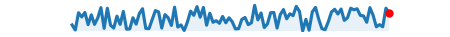
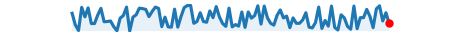
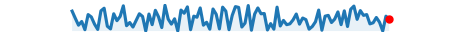
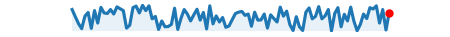

In [6]:
df['Last 7 Days Price']  = df['Price History'].apply(create_line)
df['Last 10 Days Trade Volume'] = df['Price History'].apply(create_hist)

HTML(df.to_html(escape=False))